Notebook where to plot the curves and display the performance of all models in 
a chosen folder. It is also where to conduct the performance analysis about the
models database.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp

from contrastive.utils.models_database import import_bdd

In [3]:
import os

def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:])

## Use the different-n database

In [10]:
database_path = "/neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_HCP-UkBioBank_different-n_evaluation-ACCpatterns-1.csv"
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.loc[bdd.dataset_name.str.contains("UkBioBank"), "dataset_name"] = "UKBioBank"
bdd.loc[bdd.dataset_name.str.contains("ACCpatterns"), "dataset_name"] = "ACC-1"
bdd.loc[bdd.dataset_name.str.contains("HCP"), "dataset_name"] = "HCP-2"

In [11]:
bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,checkerboard_size,dataset_name,depth_decoder,...,temperature_initial,weight_decay,with_labels,exclude,pretrained_model_path,proportion_pure_contrastive,sigma_labels,temperature_supervised,train_val_csv_file,numpy_all
27,/neurospin/dico/data/deep_folding/papers/micca...,0.772855,0.003858,0.715836,0.010503,convnet,16,4,HCP-2,3,...,0.1,0.00005,False,False,NaN,NaN,NaN,NaN,NaN,NaN
28,/neurospin/dico/data/deep_folding/papers/micca...,0.767657,0.002842,0.713474,0.006021,convnet,16,4,HCP-2,3,...,0.1,0.00005,False,False,NaN,NaN,NaN,NaN,NaN,NaN
47,/neurospin/dico/data/deep_folding/papers/micca...,0.765963,0.002649,0.722620,0.004610,convnet,16,4,UKBioBank,3,...,0.1,0.00005,True,False,NaN,1.0,2.0,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,NaN
46,/neurospin/dico/data/deep_folding/papers/micca...,0.760724,0.002642,0.705848,0.009677,convnet,16,4,HCP-2,3,...,0.1,0.00005,True,False,NaN,1.0,2.0,0.3,/neurospin/dico/data/deep_folding/current/data...,NaN
45,/neurospin/dico/data/deep_folding/papers/micca...,0.759363,0.003338,0.730620,0.006459,convnet,16,4,HCP-2,3,...,0.1,0.00005,True,False,NaN,1.0,2.0,0.3,/neurospin/dico/data/deep_folding/current/data...,NaN


In [12]:
bdd = bdd.copy()
bdd["model_name"] = "=0"
bdd["model_name"] = bdd.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd.loc[bdd.dataset_name=="ACC","model_name"] = "cingulate_ACCpatterns_0_n=171"
bdd.loc[bdd.model_name=="all","model_name"] = "cingulate_HCP_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1101"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd["n"] = -1
bdd["n"] = bdd.model_name.apply(lambda x: int(x.split(sep='=')[-1]))
bdd["n"] = bdd.apply(lambda x: x["nb_subjects"] if x["nb_subjects"]>=0 else x["n"], axis=1)
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd[["auc", "nb_subjects", "n", "dataset_name", "model_name", "short_model_path"]][bdd.short_model_path.str.contains("1101")].sort_values(by='n')

,auc,nb_subjects,n,dataset_name,model_name,short_model_path
27,0.772855,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_0
28,0.767657,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_2
47,0.765963,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-51-46_0
29,0.759345,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_3
48,0.754996,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-51-46_1
51,0.752281,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_0
50,0.749047,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_2
25,0.746703,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_1
26,0.738183,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_4
49,0.732928,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_1


(0.5, 0.8)

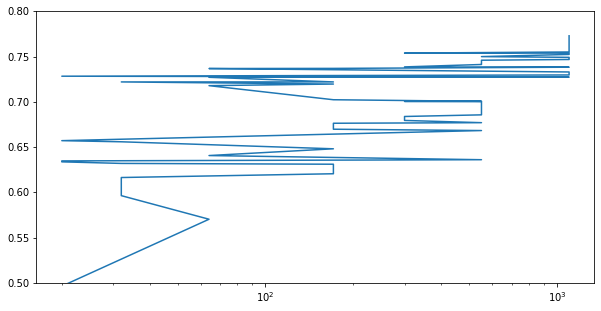

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bdd.n, bdd.auc)
ax.set_xscale("log")
ax.set_ylim([0.5,0.8])

(0.5, 0.8)

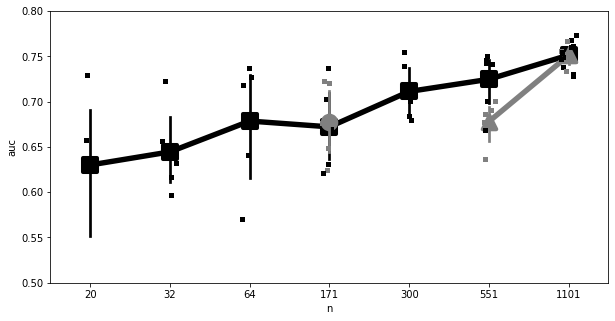

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd, x=bdd.n, y="auc", palette=['black', 'grey', 'grey'],markers=['s', '^','o'], hue='dataset_name', linestyles=['-','-','-'], scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.n, y="auc", marker='s', palette=['black', 'grey', 'grey'], hue='dataset_name', jitter=1, ax=ax)
ax.legend([],[], frameon=False)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')

In [8]:
database_path = "/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv"

In [9]:
bdd_n_site = import_bdd(database_path, verbose=True)
bdd_n_site.sort_values(by='auc', inplace=True)
print(bdd_n_site[bdd_n_site.model_path.str.contains("training-on-hcp-2-n=551")])
bdd_n_site = bdd_n_site[bdd_n_site.exclude == 'False']

bdd_n_site["model_name"] = bdd_n_site.model_path.apply(lambda x: x.split(sep='/')[-2])
print(bdd_n_site[bdd_n_site["model_name"]=="training-on-hcp-2-n=551"])
bdd_n_site.head()

path /neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv
0 have been removed for bad learning
                                           model_path       auc   auc_std  \
29  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.668262  0.002930   
26  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741189  0.002659   
25  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741980  0.003783   
27  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.745901  0.003135   
28  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.749881  0.003085   

    accuracy  accuracy_std          dataset_name   model  n_max  with_labels  \
29  0.662199      0.008900  cingulate_HCP_half_2  SimCLR   1080        False   
26  0.691532      0.006607  cingulate_HCP_half_2  SimCLR   1080        False   
25  0.690924      0.008623  cingulate_HCP_half_2  SimCLR   1080        False   
27  0.699181      0.006776  cingulate_HCP_

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name
12,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.496505,0.035252,0.551228,0.010062,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20
32,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.570375,0.015530,0.588257,0.012994,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=64
23,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.596417,0.045014,0.584515,0.010981,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=32
20,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.616425,0.007069,0.616936,0.010266,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=32
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.620586,0.010187,0.625216,0.013397,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171


In [ ]:
bdd_n_site[bdd_n_site.model_name=='training-on-hcp-2-n=551']

In [ ]:
bdd_n = bdd_n_site[(bdd_n_site["dataset_name"] != "cingulate_ACCpatterns_0")].copy(deep=True)
print(bdd_n[bdd_n.model_name=='training-on-hcp-2-n=551'])
bdd_n["n"] = bdd_n.model_name.apply(lambda x: int(float(x.split(sep='=')[-1])))
# bdd_n = bdd_n[bdd_n["n"]<=551]
bdd_n['id'] = True
bdd_n[bdd_n.model_name=='training-on-hcp-2-n=551']

In [ ]:
bdd_n[bdd_n.model_name=="training-on-hcp-2-n=551"]

In [ ]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd_n, x=bdd_n.n, y="auc", palette=['black'], hue='id', markers='s', linestyles=['-'], scale=2,ax=axs)
sns.stripplot(data=bdd_n, x=bdd_n.n, y="auc", marker='s', palette=['black'], jitter=.05, ax=axs)
axs.legend([],[], frameon=False)
axs.set_ylim([0.5,0.8])

In [ ]:
bdd.head()

In [ ]:
bdd_uk = bdd.copy()[["auc", "model_name", "n"]]
bdd_uk.head()

In [ ]:
bdd_all = bdd_n.copy()[["auc", "model_name", "n"]]
bdd_all.head()

In [ ]:
bdd_concat = pd.concat([bdd_all, bdd_uk])

In [ ]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd_concat, x=bdd_concat.n, y="auc", palette=['black'], markers='s', linestyles=['-'], scale=2,ax=axs)
sns.stripplot(data=bdd_concat, x=bdd_concat.n, y="auc", marker='s', palette=['black'], jitter=.05, ax=axs)
axs.legend([],[], frameon=False)
axs.set_ylim([0.5,0.8])

In [ ]:
bdd_n2 = bdd_n_site.copy(deep=True)
bdd_n2["n"] = bdd_n2.model_name.apply(lambda x: int((x.split(sep='=')[-1])))
bdd_n2 = bdd_n2[bdd_n2["n"]<=551]
bdd_n2.head()

In [ ]:
bdd_n2[bdd_n2.n == 20]

In [ ]:
bdd_n2.rename(columns={"n": "training set size"}, inplace=True)

In [ ]:
def plotting_against_n(bdd, ax, label_axes=True):
    sns.pointplot(data=bdd, x=bdd["training set size"], y="auc", palette=['black', 'grey'], hue='dataset_name', markers=['s', 'o'], linestyles=['-', '--'], scale=2,ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_HCP_half_2"], x=bdd["training set size"], y="auc", marker='s', palette=['black'], jitter=.05, ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_ACCpatterns_0"], x=bdd["training set size"], y="auc", marker='s', palette=['grey'], jitter=.1, ax=ax)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend([handles[0], handles[1]], ["HCP-2", "ACC-1"], fontsize=14, labelspacing=1.)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set_ylabel("")
        ax.set_yticks([])

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_against_n(bdd=bdd_n2, ax=ax)

In [ ]:
bdd_n2[bdd_n2.dataset_name=="cingulate_ACCpatterns_0"].auc

In [ ]:
bdd_n2[(bdd_n2.dataset_name=="cingulate_HCP_half_2") & (bdd_n2["training set size"]==171)].auc

In [ ]:
from scipy import stats
stats.ttest_ind(bdd_n2[bdd_n2.dataset_name=="cingulate_ACCpatterns_0"].auc, bdd_n2[(bdd_n2.dataset_name=="cingulate_HCP_half_2") & (bdd_n2["training set size"]==171)].auc)

In [ ]:
bdd_n2.model_name[:7]

In [ ]:
bdd_site = bdd_n_site[(bdd_n_site.model_name == "training-on-hcp-2-n=171") | (bdd_n_site.model_name == "convnet-10-n=171")].copy(deep=True)

In [ ]:
bdd_site["training_set"] = bdd_site.model_name.apply(lambda x: "HCP-2" if x=="training-on-hcp-2-n=171" else "ACC-1")
bdd_site

In [ ]:
bdd_site.rename(columns={"training_set": "training set"}, inplace=True)

In [ ]:
def plotting_against_site(bdd, ax, label_axes=True):
    ax.set_title("n = 171", fontsize=18)
    sns.pointplot(data=bdd, x=bdd["training set"], y="auc", hue="training set", palette=['black', 'grey'], markers=['s', 'o'], linestyles=['-', '-'], scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd["training set"], y="auc", marker='s', palette=['black', 'grey'], jitter=.05, ax=ax)
    ax.legend([],[], frameon=False)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_against_site(bdd=bdd_site, ax=ax)

## Variation with batch size

In [ ]:
batch_bdd = pd.read_csv("/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_batch-size_training-HCP-half-2_evaluation-ACCpatterns-1.csv")

In [ ]:
batch_bdd.rename(columns={"batch_size": "batch size"}, inplace=True)

In [ ]:
batch_bdd.head()

In [ ]:
def plotting_against_batch_size(bdd, ax, label_axes=True):
    sns.pointplot(data=bdd, x=bdd["batch size"], markers='s', color='black', y="auc", scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd["batch size"], y="auc", marker='s', color='black', jitter=.05, ax=ax)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)
    ax.set_ylabel("")
    ax.set_yticks([])
    secax = ax.secondary_yaxis('right')
    secax.set_ylabel('auc', rotation=270, labelpad=15)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))
plotting_against_batch_size(bdd=batch_bdd, ax=ax)

## Summary

In [ ]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1,3, figsize=(17, 5))

plotting_SimCLR_betaVAE(bdd=res_bdd, ax=axs[0])
plotting_against_n(bdd=bdd_n2, ax=axs[1], label_axes=False)
# plotting_against_site(bdd=bdd_site, ax=axs[2], label_axes=False)
plotting_against_batch_size(bdd=batch_bdd, ax=axs[2], label_axes=False)

In [ ]:
f.savefig(save_fig_path + "/testing.png")